In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
data = pd.read_excel(r'C:\Users\netto\Desktop\Resumo_Curso_Datascience\HIST_PAINEL_COVIDBR_15jul2020.xlsx')


In [3]:
data = data.drop(data[data.coduf == 76].index)
data = data.drop(data[data.codRegiaoSaude > 0].index)


In [4]:
data = data.drop(['interior/metropolitana','emAcompanhamentoNovos','Recuperadosnovos'],axis=1)
data = data.drop(['casosNovos','casosAcumulado','semanaEpi','nomeRegiaoSaude','codRegiaoSaude','codmun','coduf','regiao'],axis=1)
data = data.drop(['municipio'],axis=1)


In [5]:
data.dropna(subset=['populacaoTCU2019'], inplace=True)


In [23]:
Inicio_intervalo = 0
fim_intervalo = 142
list = []
list_02 = []
for fim_intervalo in range(142,3834,142):
    Obitos = data.iloc[Inicio_intervalo:fim_intervalo, 3]
    Estado = data.iloc[Inicio_intervalo, 0]
    Inicio_intervalo = Inicio_intervalo + 142
    list.append(max(Obitos))
    list_02.append(Estado)

    


In [24]:

Densidades_demograficas = pd.read_html('http://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_densidade_demogr%C3%A1fica')


In [25]:
del Densidades_demograficas[1]

In [26]:

Tabela_densidade = Densidades_demograficas[0]


In [27]:
Significado_sigla = {
  "RO": "Rondônia",
  "AC": "Acre",
  "AM": "Amazonas",
  "RR": "Roraima",
  "PA": "Pará",
  "AP": "Amapá",
  "TO": "Tocantins",
  "MA": "Maranhão",
  "PI": "Piauí",
  "CE": "Ceará",
  "RN": "Rio Grande do Norte",
  "PB": "Paraíba",
  "PE": "Pernambuco",
  "AL": "Alagoas",
  "SE": "Sergipe",
  "BA": "Bahia",
  "MG": "Minas Gerais",
  "ES": "Espírito Santo",
  "RJ": "Rio de Janeiro",
  "SP": "São Paulo",
  "PR": "Paraná",
  "SC": "Santa Catarina",
  "RS": "Rio Grande do Sul",
  "MS": "Mato Grosso do Sul",
  "MT": "Mato Grosso",
  "GO": "Goiás",
}


In [28]:
indexação_densidade = Tabela_densidade.set_index(['Unidade federativa'])
        

In [29]:
list_03 = []
for name,dict_ in Significado_sigla.items():
    Densidade_estado = indexação_densidade.loc[[dict_],['Densidade demográfica (projeção 2019)']]    
    Lista_densidades = Densidade_estado.iloc[0:2,0] 
    list_03.append(max(Lista_densidades)/100)

In [30]:
Tabela_valores = {'Densidade Demográfica':  list_03,
        'Obitos Acumulados': list,
        }

In [31]:
Grafico = pd.DataFrame(Tabela_valores, columns = ['Densidade Demográfica', 'Obitos Acumulados'])

Densidade_por_estado = Densidade_estado.iloc[1,1]


In [32]:
y = Grafico['Obitos Acumulados']
x1 = Grafico['Densidade Demográfica']
      

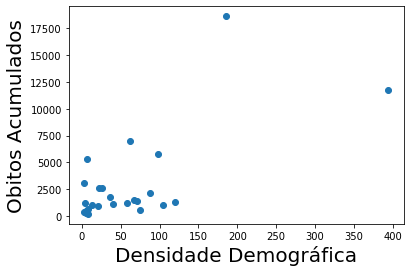

In [33]:
plt.scatter(x1,y)
plt.xlabel('Densidade Demográfica', fontsize = 20)
plt.ylabel('Obitos Acumulados', fontsize = 20)
plt.show()


In [34]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary() 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Obitos Acumulados   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     20.63
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           0.000133
Time:                        14:18:41   Log-Likelihood:                -244.88
No. Observations:                  26   AIC:                             493.8
Df Residuals:                      24   BIC:                             496.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   854.3827    751.553      1.137      0.267    -696.746    2405.512
Densidade Demográfica    34.1672      7.523      4.542      0.000      18.641      49.693
==============================================================================
Omnibus:                       28.822   Durbin-Watson:                   2.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.630
Skew:                           2.206   Prob(JB):                     1.13e-13
Kurtosis:                       8.965   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

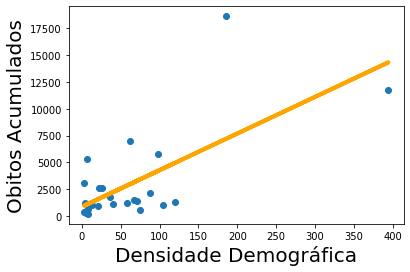

In [36]:
plt.scatter(x1,y)
yhat = 34.1672	*x1 + 854.3827
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Densidade Demográfica', fontsize = 20)
plt.ylabel('Obitos Acumulados', fontsize = 20)
plt.show()
